<a href="https://colab.research.google.com/github/22104071/GS_071/blob/main/DCT_Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Decision Tree Classifier**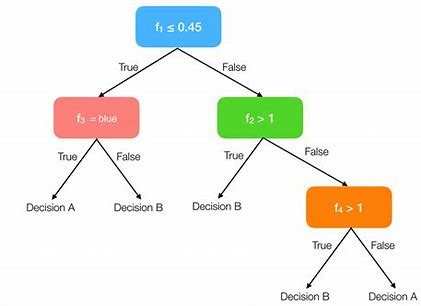

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [33]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [34]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [36]:
df[df.duplicated()] #If blank rows are shown as output, it implies no duplication is there

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [37]:
df.isna().sum()  #To check any null value

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

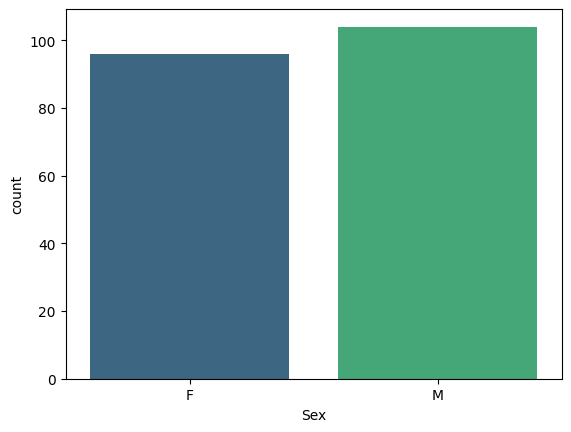

In [38]:
x = df.Sex.value_counts()
x
p = sns.countplot(x='Sex', data=df,palette='viridis')
plt.show()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


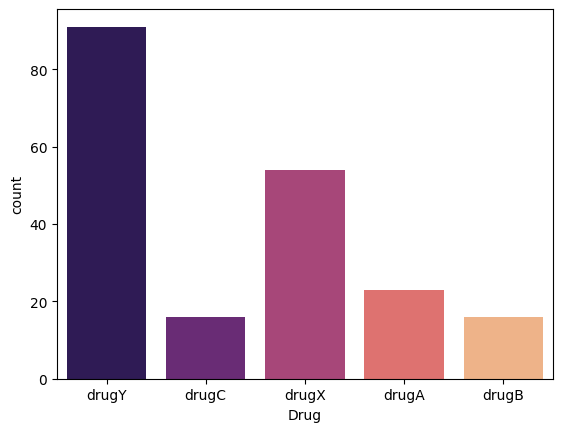

In [39]:
m = df.Drug.value_counts()
print(m)
p = sns.countplot(x='Drug', data=df,palette='magma',hue='Drug')
plt.show()

In [40]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

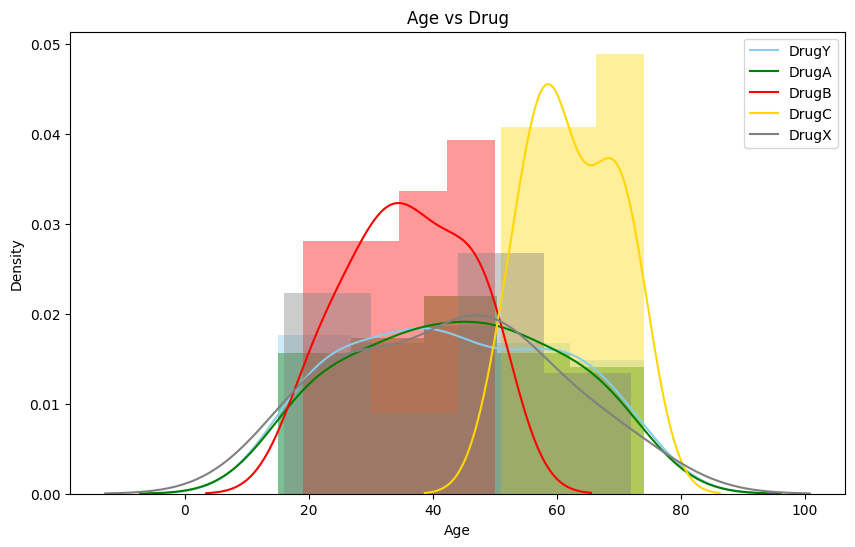

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Drug']=='drugY']['Age'],color='skyblue')
sns.distplot(df[df['Drug']=='drugX']['Age'],color='green')
sns.distplot(df[df['Drug']=='drugA']['Age'],color='red')
sns.distplot(df[df['Drug']=='drugB']['Age'],color='gold')
sns.distplot(df[df['Drug']=='drugC']['Age'],color='grey')
plt.legend(['DrugY','DrugA','DrugB','DrugC','DrugX'])
plt.title('Age vs Drug')
plt.show()

In [49]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe=OrdinalEncoder()
df['Drug']=oe.fit_transform(df[['Drug']])
le = LabelEncoder()
df['Sex'] = oe.fit_transform(df[['Sex']])
df['BP'] = oe.fit_transform(df[['BP']])
df['Cholesterol'] = oe.fit_transform(df[['Cholesterol']])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4.0
1,47,1.0,1.0,0.0,13.093,2.0
2,47,1.0,1.0,0.0,10.114,2.0
3,28,0.0,2.0,0.0,7.798,3.0
4,61,0.0,1.0,0.0,18.043,4.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,2.0
196,16,1.0,1.0,0.0,12.006,2.0
197,52,1.0,2.0,0.0,9.894,3.0
198,23,1.0,2.0,1.0,14.020,3.0


In [44]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [50]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [51]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [53]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
134,42,0,0,0,21.036
66,29,1,0,0,12.856
26,31,1,0,0,30.366
113,65,0,1,1,13.769
168,51,0,1,1,23.003
...,...,...,...,...,...
67,17,1,2,1,10.832
192,72,1,1,0,16.310
117,40,0,2,0,10.103
47,68,1,1,0,10.291


In [54]:
y_train

134    drugY
66     drugA
26     drugY
113    drugX
168    drugY
       ...  
67     drugX
192    drugY
117    drugX
47     drugC
172    drugY
Name: Drug, Length: 160, dtype: object

In [55]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
18,23,1,1,0,7.298
170,28,0,2,0,12.879
107,42,1,1,0,20.013
98,20,1,0,1,35.639
177,25,1,2,0,19.011
182,20,0,1,1,11.686
5,22,0,2,0,8.607
146,37,0,1,1,12.006
12,43,1,1,0,15.376
152,55,1,2,1,7.261


In [56]:
y_test

18     drugC
170    drugX
107    drugY
98     drugY
177    drugY
182    drugX
5      drugX
146    drugX
12     drugY
152    drugX
61     drugA
125    drugY
180    drugY
154    drugY
80     drugB
7      drugC
33     drugY
130    drugY
37     drugX
74     drugY
183    drugY
145    drugX
45     drugX
159    drugX
60     drugY
123    drugY
179    drugY
185    drugY
122    drugY
44     drugX
16     drugX
55     drugC
150    drugA
111    drugX
22     drugY
189    drugY
129    drugX
4      drugY
83     drugA
106    drugX
Name: Drug, dtype: object

In [67]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=0)
clf_gini.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

In [68]:
y_pred_gini = clf_gini.predict(x_test)

In [69]:
y_pred_gini

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugX'], dtype=object)

In [73]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index(%): {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)*100))

Model accuracy score with criterion gini index(%): 100.0000


In [75]:
from sklearn import tree

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.704\nsamples = 160\nvalue = [20, 15, 13, 40, 72]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.691\nsamples = 88\nvalue = [20, 15, 13, 40, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.49\nsamples = 35\nvalue = [20, 15, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.37\nsamples = 53\nvalue = [0, 0, 13, 40, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 26\nvalue = [0, 0, 13, 13, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 72\nvalue = [0, 0, 0, 0, 72]')]

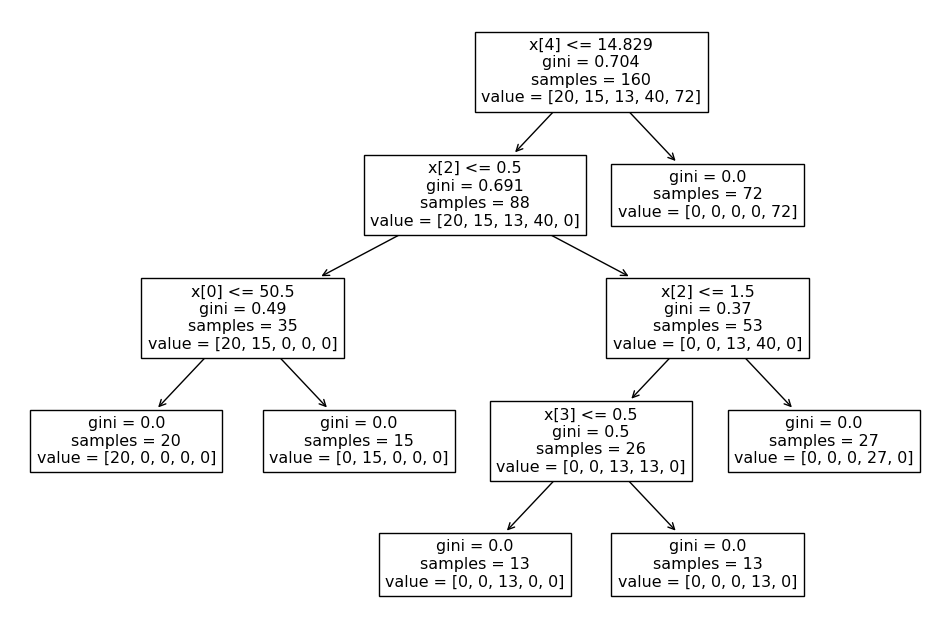

In [76]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [79]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf_entropy.fit(x_train,y_train)
y_pred_entropy = clf_entropy.predict(x_test)


In [82]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy (%): {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)*100))

Model accuracy score with criterion entropy (%): 87.5000


[Text(0.625, 0.875, 'x[4] <= 14.829\nentropy = 2.008\nsamples = 160\nvalue = [20, 15, 13, 40, 72]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\nentropy = 1.846\nsamples = 88\nvalue = [20, 15, 13, 40, 0]'),
 Text(0.25, 0.375, 'x[0] <= 50.5\nentropy = 0.985\nsamples = 35\nvalue = [20, 15, 0, 0, 0]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.75, 0.375, 'x[2] <= 1.5\nentropy = 0.804\nsamples = 53\nvalue = [0, 0, 13, 40, 0]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 26\nvalue = [0, 0, 13, 13, 0]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 72\nvalue = [0, 0, 0, 0, 72]')]

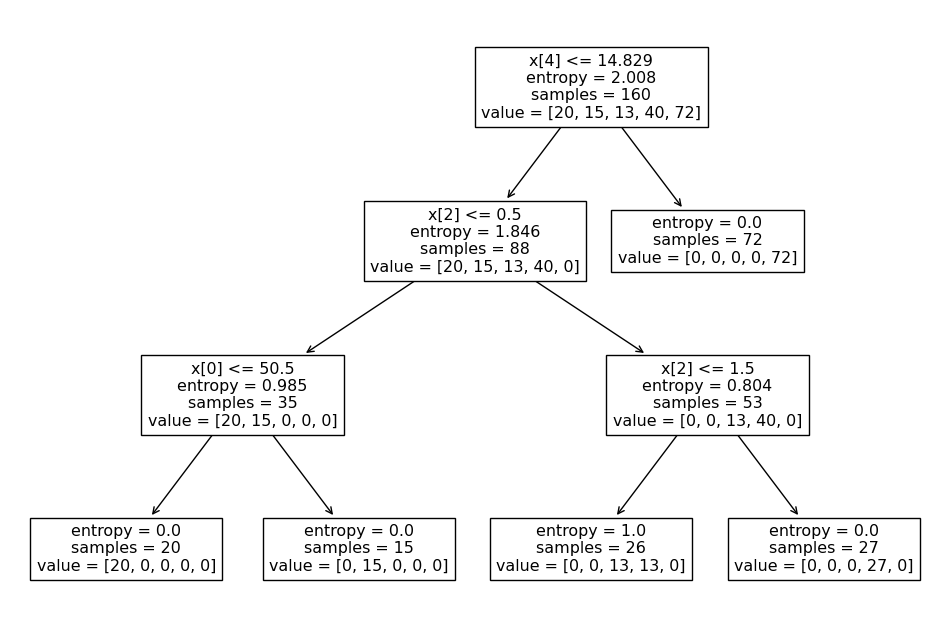

In [80]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(x_train,y_train))